In [1]:
# ------> make sure you have installed the package before loading it <------- #
# e.g. if you want to install package xyz, then run install.packages("xyz") 
library(IBrokers)
library(xts) # installed by IBrokers
library(lubridate)
library(plyr)
library(forecast)
library(tseries) # installed by forecast
library(ggplot2) # installed by forecast

#########################################################################################
############################## BASICS IN R ###############################################
##########################################################################################

# begin with a fresh start
rm(list = ls())

x <- 1:5
names(x) <- letters[1:5] # assign names to x
x
x["c"] # pull any name
x["z"] # unavailable

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

IBrokers version 0.9-10.  Implementing API Version 9.64

IBrokers comes with NO WARRANTY.  Not intended for production use!


See ?IBrokers for details.

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here



a b c d e 
1 2 3 4 5

c 
3

<NA> 
  NA

## XTS Package
Used for time series manipulation

                [,1]
2017-08-10 0.5543269

                  [,1]
2017-05-03  0.85663511
2017-05-04  0.06722356
2017-05-05  0.21383426
2017-05-06 -1.22542595
2017-05-07 -0.25557803
2017-05-08 -1.41613295
2017-05-09 -1.36430159
2017-05-10 -1.21377810
2017-05-11 -0.56550536
2017-05-12  0.37989570
2017-05-13  1.00406897
2017-05-14  1.60212039
2017-05-15 -1.08276971
2017-05-16  0.39251449
2017-05-17 -0.08248357
2017-05-18  1.38851305
2017-05-19 -1.99687548
2017-05-20 -1.19435471
2017-05-21  0.29751322
2017-05-22 -0.07606216
2017-05-23  0.45027946
2017-05-24  0.44243942
2017-05-25 -0.39869853
2017-05-26  1.74542691
2017-05-27 -1.17737519
2017-05-28  0.10715648
2017-05-29 -1.90767369
2017-05-30 -0.51669734
2017-05-31 -0.06144699
2017-06-01 -1.08680215
2017-06-02 -0.23944276
2017-06-03  1.14382456
2017-06-04  1.15036548
2017-06-05 -0.57389450
2017-06-06 -0.92052508
2017-06-07  1.01306586
2017-06-08 -0.88892233
2017-06-09 -0.14780711
2017-06-10  0.29827174
2017-06-11 -1.26157415
2017-06-12  0.69967564
2017-06-13  1.48369123
2017-06-14 

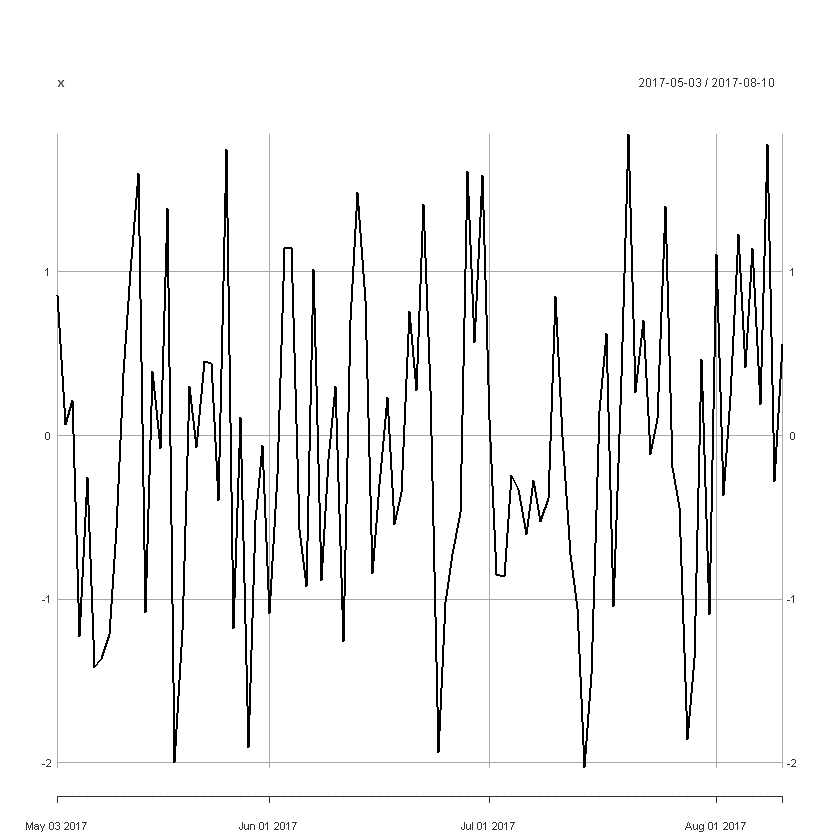

In [10]:
n <- 100
set.seed(13)
x <- rnorm(n) ##generate values
date_labels <- date(today()) - 0:(n-1)  ##generate dates
names(x) <- as.character(date(today()) - 0:(n-1))
x <- as.xts(x)
x[today(),]
x
plot(x)

In [13]:
# note date that
today() - 1 # returns yesterday's date

# there is special apply functions for xts items
apply.monthly(x,max) # returns the max value of the month
apply.quarterly(x,max) #  returns the max value of the quarter

# as before we can use generalized functions
apply.quarterly(x, function(y)  mean(y)/sd(y)  )

[1] "2017-08-09"

               [,1]
2017-05-31 1.745427
2017-06-30 1.614479
2017-07-31 1.836163
2017-08-10 1.775163

               [,1]
2017-06-30 1.745427
2017-08-10 1.836163

                  [,1]
2017-06-30 -0.06136022
2017-08-10 -0.06998489

## Time Series in Data.Frame

In [15]:
x <- data.frame(Date = date(x), x = x[,1])
rownames(x) <- NULL
summary(x)
# add year and month variables
x$Y <- year(x$Date); x$M <- month(x$Date);

# max value over month
max_month_x <- ddply(x,c("Y","M"), function(z) data.frame( max_x = max(z$x) ) )
names(max_month_x)

# we can merge it back to the original data
x <- merge(x,max_month_x,c("Y","M"))
head(x)

# look at difference from max
x$x_max_diff <- x$max_x - x$x

# plot x versus such difference
plot(x ~ Date, data = x, type = "l", ylim = range(c(x,max_x,x_max_diff)))
lines(x_max_diff ~ Date, data = x, col = 2)
lines(max_x ~ Date, data = x, lty = 2)


ERROR: Error in as.POSIXlt.default(x, tz = tz(x)): do not know how to convert 'x' to class "POSIXlt"


In [31]:
#########################################################################################
############################## USING THE IB API ###############################################
##########################################################################################
# fresh start again
rm(list = ls())

# make sure you are connected to the IB API
tws <- twsConnect()
isConnected(tws) # should be true
ac <- reqAccountUpdates(tws) # requests account details
security <- twsSTK("AAPL") # choose security of interest
#is.twsContract(security) # make sure it is identified
P <- reqHistoricalData(tws,security, barSize = '5 mins',duration = "1 Y")
head(P)
# look at the last data from today
tail(P[date(P) == today(),])

[1] TRUE

TWS Message: 2 -1 2100 API client has been unsubscribed from account data. 
waiting for TWS reply on AAPL .... done.


Warning message in is.na(strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz)):
"closing unused connection 5 (->localhost:7496)"Warning message in is.na(strptime(xx, f <- "%Y-%m-%d %H:%M:%OS", tz = tz)):
"closing unused connection 4 (->localhost:7496)"

                    AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume
2016-08-11 06:30:00    108.55    108.79   108.51     108.62       14954
2016-08-11 06:35:00    108.62    108.93   108.62     108.86        9103
2016-08-11 06:40:00    108.86    108.93   108.80     108.85        5944
2016-08-11 06:45:00    108.85    108.93   108.75     108.77        3496
2016-08-11 06:50:00    108.78    108.86   108.69     108.77        4271
2016-08-11 06:55:00    108.77    108.78   108.54     108.56        3452
                    AAPL.WAP AAPL.hasGaps AAPL.Count
2016-08-11 06:30:00  108.598            0       3915
2016-08-11 06:35:00  108.804            0       4073
2016-08-11 06:40:00  108.873            0       3281
2016-08-11 06:45:00  108.826            0       1937
2016-08-11 06:50:00  108.769            0       2386
2016-08-11 06:55:00  108.680            0       2089

In [ ]:
## 

In [40]:
# make sure you are connected to the IB API
tws <- twsConnect()
isConnected(tws)
# if we wish to download multiple securities
v.list <- c("AAPL","TSLA","GOOG")
security.list <- lapply(v.list,twsSTK)
sapply(security.list,is.twsContract) # check if true
P.list <- lapply(security.list, function(security)  reqHistoricalData(tws,security, barSize = '5 mins',duration = "1 Y") )

# Finally, we can disconnect, as data will be stored in the system's memory
twsDisconnect(tws)
isConnected(tws)

# Let's look at the data list we just downloaded
length(P.list); 
names(P.list) <- v.list
head(P.list[["AAPL"]])
                 
# any analysis applied to a security can applied to multiple one using the list of prices
lapply(P.list,summary)
sapply(P.list,nrow) # number of data points for each security

# pull the desired info
var_name <- "Close"
P2.list <- lapply(P.list,function(x) x[,grep(var_name,names(x))]  )

# --> grep is a useful function to identify characters in a string, e.g.
grep("In",c("Interactive", "Brokers") )
grep("ok",c("Interactive", "Brokers") )

# note that the new list has one variable for each ticker
sapply(P2.list,ncol) 

# finally, we merge altogether
P_all <- Reduce(function(...) merge(..., all = T),P2.list)
# --> Reduce allows user to execute functions on list simultaneously
# --> This is helpful when merging data is needed

# To save the data, you can use write.zoo or write.csv if the time series is given as a data.frame
write.zoo(P_all,"IB_data.csv",sep = ",")

# To load it, R will read it as a data frame
P2 <- read.csv("IB_data.csv") 
# it needs some adjustment to read it as an xts object
rownames(P2) <- P2[,1] 
P2 <- as.xts(P2[,-1]) # drop the date and save as an xts object

[1] TRUE

[1] TRUE TRUE TRUE

TWS Message: 2 -1 2104 Market data farm connection is OK:usfuture 
TWS Message: 2 -1 2104 Market data farm connection is OK:usfarm.us 
TWS Message: 2 -1 2104 Market data farm connection is OK:usfarm 
TWS Message: 2 -1 2106 HMDS data farm connection is OK:ilhmds 
TWS Message: 2 -1 2106 HMDS data farm connection is OK:euhmds 
TWS Message: 2 -1 2106 HMDS data farm connection is OK:fundfarm 
TWS Message: 2 -1 2106 HMDS data farm connection is OK:ushmds 
waiting for TWS reply on AAPL .... done.
waiting for TWS reply on TSLA .... done.
waiting for TWS reply on GOOG .... done.


[1] FALSE

[1] 3

                    AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume
2016-08-12 06:30:00    107.78    108.24   107.77     108.20       12920
2016-08-12 06:35:00    108.20    108.34   108.15     108.26        6727
2016-08-12 06:40:00    108.25    108.40   108.24     108.32        4437
2016-08-12 06:45:00    108.33    108.35   108.08     108.23        4091
2016-08-12 06:50:00    108.23    108.29   108.17     108.20        3784
2016-08-12 06:55:00    108.19    108.28   108.18     108.23        2643
                    AAPL.WAP AAPL.hasGaps AAPL.Count
2016-08-12 06:30:00  107.935            0       3503
2016-08-12 06:35:00  108.240            0       3391
2016-08-12 06:40:00  108.334            0       2357
2016-08-12 06:45:00  108.214            0       2122
2016-08-12 06:50:00  108.230            0       1958
2016-08-12 06:55:00  108.219            0       1419

$AAPL
     Index                          AAPL.Open       AAPL.High    
 Min.   :2016-08-12 06:30:00.00   Min.   :102.7   Min.   :103.3  
 1st Qu.:2016-11-09 11:28:45.00   1st Qu.:113.9   1st Qu.:114.0  
 Median :2017-02-11 21:42:30.00   Median :133.0   Median :133.2  
 Mean   :2017-02-11 04:00:59.55   Mean   :130.3   Mean   :130.4  
 3rd Qu.:2017-05-12 11:26:15.00   3rd Qu.:145.1   3rd Qu.:145.2  
 Max.   :2017-08-11 12:55:00.00   Max.   :161.7   Max.   :161.8  
    AAPL.Low       AAPL.Close     AAPL.Volume        AAPL.WAP      AAPL.hasGaps
 Min.   :102.5   Min.   :103.1   Min.   :   339   Min.   :103.1   Min.   :0    
 1st Qu.:113.8   1st Qu.:113.9   1st Qu.:  1406   1st Qu.:113.9   1st Qu.:0    
 Median :132.7   Median :133.1   Median :  2101   Median :133.0   Median :0    
 Mean   :130.3   Mean   :130.3   Mean   :  3052   Mean   :130.3   Mean   :0    
 3rd Qu.:144.9   3rd Qu.:145.1   3rd Qu.:  3449   3rd Qu.:145.1   3rd Qu.:0    
 Max.   :161.5   Max.   :161.7   Max.   :106867   Ma

AAPL  TSLA  GOOG 
19584 19567 19584

[1] 1

[1] 2

AAPL TSLA GOOG 
   1    1    1

In [ ]:
#########################################################################################
############################## BASICS IN R ###############################################
##########################################################################################

# begin with a fresh start
rm(list = ls())

x <- 1:5
names(x) <- letters[1:5] # assign names to x
x
x["c"] # pull any name
x["z"] # unavailable

# R has built-in objects such as letters/LETTERS
letters; LETTERS;

# we will use both loops and lapply/sapply functions

# loops
w <- integer()
for(i in 1:5) {
  w <- c(w,i)
  names(w)[i] <- letters[i]
}
w
identical(x,w)

# use sapply function
z <- sapply(1:5, function(i)  { result <- i; names(result) <- letters[i]; result }  )
z
identical(x,z)

rm(x);rm(w);rm(z)


#######################
## MATRICES ###########
#######################

X <- matrix(rnorm(50),10,5)
dim(X) # dimension
apply(X,2,mean) # average across columns: 2 for second dimension
apply(X,1,mean) # average across rows: 1 for first dimension

# we could define any function as follows
A1 <- apply(X,2, function(x)  x[1]*x[length(x)] )
A2 <- X[1,]*X[nrow(X),]
identical(A1,A2) # yields the same

rownames(X) <- 1:nrow(X)
colnames(X) <- letters[1:ncol(X)]
X
X["10","c"] # you can pull any element using the corresponding key/name

# summary is a general function
summary(X)

# we can also look at X as a data frame
X2 <- data.frame(X)
class(X2)


####################
### PLOTTING #######
####################

x <- rnorm(100)
y <- 1 + 5*x +rnorm(100)
plot(y~x)
lm_yx <- lm(y~x)
lines(fitted(lm_yx) ~ x, col = 2, lty = 2) # add a fitted line

###############################
########## xts package ########
###############################

n <- 100
set.seed(13)
x <- rnorm(n)
date_labels <- date(today()) - 0:(n-1) 
names(x) <- as.character(date(today()) - 0:(n-1))
x <- as.xts(x)
x[today(),]
plot(x)

# note date that
today() - 1 # returns yesterday's date

# there is special apply functions for xts items
apply.monthly(x,max) # returns the max value of the month
apply.quarterly(x,max) #  returns the max value of the quarter

# as before we can use generalized functions
apply.quarterly(x, function(y)  mean(y)/sd(y)  )

####################################
## time series as a data.frame #####
####################################

# look at x as a data.frame instead
x <- data.frame(Date = date(x), x = x[,1])
rownames(x) <- NULL
summary(x)
# add year and month variables
x$Y <- year(x$Date); x$M <- month(x$Date);

# max value over month
max_month_x <- ddply(x,c("Y","M"), function(z) data.frame( max_x = max(z$x) ) )
names(max_month_x)

# we can merge it back to the original data
x <- merge(x,max_month_x,c("Y","M"))
head(x)

# look at difference from max
x$x_max_diff <- x$max_x - x$x

# plot x versus such difference
plot(x ~ Date, data = x, type = "l", ylim = range(c(x,max_x,x_max_diff)))
lines(x_max_diff ~ Date, data = x, col = 2)
lines(max_x ~ Date, data = x, lty = 2)

#########################################################################################
############################## USING THE IB API ###############################################
##########################################################################################
# fresh start again
rm(list = ls())

# make sure you are connected to the IB API
tws <- twsConnect()
isConnected(tws) # should be true
ac <- reqAccountUpdates(tws) # requests account details
security <- twsSTK("SPY") # choose security of interest
is.twsContract(security) # make sure it is identified
P <- reqHistoricalData(tws,security, barSize = '5 mins',duration = "1 Y")
head(P)

# look at the last data from today
tail(P[date(P) == today(),])

# if we wish to download multiple securities
v.list <- c("SPY","XLF","XLU")
security.list <- lapply(v.list,twsSTK)
sapply(security.list,is.twsContract) # check if true
P.list <- lapply(security.list, function(security)  reqHistoricalData(tws,security, barSize = '5 mins',duration = "1 Y") )

# Finally, we can disconnect, as data will be stored in the system's memory
twsDisconnect(tws)
isConnected(tws)

# Let's look at the data list we just downloaded
length(P.list); 
names(P.list) <- v.list
head(P.list[["XLF"]])

# any analysis applied to a security can applied to multiple one using the list of prices
lapply(P.list,summary)
sapply(P.list,nrow) # number of data points for each security

# pull the desired info
var_name <- "Close"
P2.list <- lapply(P.list,function(x) x[,grep(var_name,names(x))]  )

# --> grep is a useful function to identify characters in a string, e.g.
grep("In",c("Interactive", "Brokers") )
grep("ok",c("Interactive", "Brokers") )

# note that the new list has one variable for each ticker
sapply(P2.list,ncol) 

# finally, we merge altogether
P_all <- Reduce(function(...) merge(..., all = T),P2.list)
# --> Reduce allows user to execute functions on list simultaneously
# --> This is helpful when merging data is needed

# To save the data, you can use write.zoo or write.csv if the time series is given as a data.frame
write.zoo(P_all,"IB_data.csv",sep = ",")

# To load it, R will read it as a data frame
P2 <- read.csv("IB_data.csv") 
# it needs some adjustment to read it as an xts object
rownames(P2) <- P2[,1] 
P2 <- as.xts(P2[,-1]) # drop the date and save as an xts object

#####################################################
################ EXAMPLE I ##########################
#####################################################
# let us look at the closing price of each time increment
price <- "Close" 
find.close <- grep("Close",names(P))
# pull the close price
P_daily <- apply.daily(P,function(x) x[nrow(x),find.close])
dim(P_daily)

# load the time series as a data.frame
P_ds <- data.frame(Date = date(P_daily),Price = as.numeric(P_daily) )
head(P_ds)

# helpful function to compute retuns
ret.f <- function(x) c(NA,x[2:length(x)]/x[1:(length(x)-1)] - 1)
ret_daily <- na.omit(data.frame(Date = P_ds$Date, Ret = ret.f(P_ds$Price)))
head(ret_daily)

# function to plot the data 
plot.time.series <- function(ds,eps) {
  mid.point <- floor(nrow(ds)/2)
  seq1 <- 1:mid.point
  seq2 <- (mid.point+1):nrow(ds)
  mu1 <- mean(ds[seq1,2])
  mu2 <- mean(ds[seq2,2])
  
  plot(ds[,2]~ ds[,1], type = "l", xlab = "Date", ylab = "", lwd = 0.5, col = 2)
  grid(10,10)
  segments(ds[1,1],mu1, ds[mid.point,1],mu1, lty  =2)
  segments(ds[mid.point+1,1],mu2, ds[nrow(ds),1],mu2, lty  =2)
  val1 <- format(mu1,digits = 5)
  val2 <- format(mu2,digits = 5)
  eq1 <- bquote(bold(mu[1] == .(val1) ))
  eq2 <- bquote(bold(mu[2] == .(val2) ))
  
  text(ds[floor(median(seq1)),1],mu1+eps,eq1  )
  text(ds[floor(median(seq2)),1],mu2+eps,eq2  )
}

# Figure 1
plot.time.series(P_ds,5) # eps = 5 to indicate where the mean be put
# Figure 2
plot.time.series(ret_daily,0.01) 


# plot the strict stationairty condition
plot.time.series2 <- function(ds) {
  mid.point <- floor(nrow(ds)/2)
  seq1 <- 1:mid.point
  seq2 <- (mid.point+1):nrow(ds)
  
  ds$Period <- "Period 1"
  ds$Period[1:nrow(ds) %in% seq2] <- "Period 2"
  ds$Period <- as.factor(ds$Period)
  
  ggplot(ds, aes(ds[,2], fill = Period)) + geom_density(alpha = 0.5) + xlab("")
}

# Figure 3
plot.time.series2(P_ds)
# Figure 3
plot.time.series2(ret_daily)

##############################
### Serial Correlation #######
##############################

cor(P_daily[-1],lag(P_daily)[-1])

R_daily <- P_daily[-1]/lag(P_daily)[-1] - 1
cor(R_daily[-1],lag(R_daily)[-1])

# another way would be to merge all time series together
P2_daily <- merge(P_daily,lag(P_daily))
head(P2_daily)
cor(P2_daily, use = "pairwise")


R2_daily <- merge(R_daily,lag(R_daily))
head(R2_daily)
cor(R2_daily,use = "pairwise")


###############################
#### TEST FOR UNIT ROOT #######
###############################
adf.test(P_daily);adf.test(R_daily)


#########################################################################################################
###################################  ARIMA MODELS ######################################################################
#########################################################################################################

# let's simulate a couple of arima process
# we use the arima.sim function
N <- 10^3
MA2 <- arima.sim(N,model = list(order = c(0,0,2), ma = c(0.5,0.3))) + 200
Acf(MA2) # starts with lag 0
AR2 <- arima.sim(N,model = list(order = c(2,0,0), ar = c(0.5,0.3))) + 200
Pacf(AR2) # starts with lag 1

#####################################################
################ EXAMPLE I ##########################
#####################################################
# Simulate an ARIMA(3,1,2) process
set.seed(13)
y <- arima.sim(N,model = list(order = c(3,1,2), ar = c(0.8, -0.5,0.4),
                              ma = c(0.5,-0.3))) + 200

# transfer it to an xts object
y <- as.numeric(y)
names(y) <- as.character( today() - (N:0) )
y <- as.xts(y)

#################################
## STEP 1: TEST FOR UNIT ROOT ###

plot(y);
ADF <- adf.test(y); 
ADF$p.value

# IF FALSE, TAKE FIRST DIFFERENCE
delta_y <- na.omit(y - lag(y))
plot(delta_y);
ADF2 <- adf.test(delta_y); 
ADF2$p.value

################################################
## STEP 2: IDENTIFY THE AR(p) MA(q) PROCESSES ##

# it is not as straightforward to tell from these plots
Acf(delta_y, main = "")
Pacf(delta_y, main = "")

p.seq <- 0:4
q.seq <- 0:4
pq.seq <- expand.grid(p.seq,q.seq)
AIC.list <- lapply(1:nrow(pq.seq),function(i)   
AIC(arima(y,c(pq.seq[i,1],1,pq.seq[i,2]))))
AIC.matrix <- matrix(unlist(AIC.list),length(p.seq))
rownames(AIC.matrix) <- p.seq
colnames(AIC.matrix) <- q.seq
AIC.matrix

identify.arima <- auto.arima(y)
identify.arima

###########################
## STEP 3: Double Check  ##

# look at the residuals and see whether they resemble a white noise process
Acf(residuals(identify.arima),main = "")
# use a test to find a statistical evidence for such
Box.test(residuals(identify.arima),type = "Ljung-Box")

## consider a number of cases in which the model is underidentified
arima1 <- arima(y,c(1,1,0))
Acf(residuals(arima1),main = "")
arima2 <- arima(y,c(1,1,1))
Acf(residuals(arima2),main = "")
arima3 <- arima(y,c(2,1,1))
Acf(residuals(arima3),main = "")
arima4 <- arima(y,c(2,1,2))
Acf(residuals(arima4),main = "")
# and finally
arima5 <- arima(y,c(3,1,2))
Acf(residuals(arima5),main = "")

#########################################################################################################
###################################  FORECASTING ######################################################################
#########################################################################################################
T. <- 150
arma.list <- numeric()
ar1.list <- numeric()
ma.list <- numeric()
i <- T.
for(i in T.:(length(R_daily)-1) ) {
  arma.list[i] <- list(auto.arima(R_daily[(i-T.+1):i])) # ARMA
  ar1.list[i] <- list(arima(R_daily[(i-T.+1):i],c(1,0,0))) # AR(1)
  ma.list[i] <- list(mean(R_daily[(i-T.+1):i])) # Momentum
  }

y <- R_daily[(T.+1):length(R_daily)]
y_hat <- sapply(arma.list[T.:length(arma.list)],
                function(x) forecast(x,1)[[4]] )
y_hat2 <- sapply(ar1.list[T.:length(ar1.list)],
                 function(x) forecast(x,1)[[4]] )
y_hat3 <- sign(unlist(ma.list))

forecast_accuracy <- cbind(mean(sign(y_hat) == sign(y)),
mean(sign(y_hat2) == sign(y)),
mean(sign(y_hat3) == sign(y)))

forecast_accuracy*100

phi <- unlist(sapply(ar1.list,function(x) coef(x)[[1]]))
names(phi) <- date(R_daily[T.:(length(R_daily)-1)])
phi <- as.xts(phi)

plot(phi,main ="")
lines(R_daily[T.:(length(R_daily)-1)], col = 2)
abline(h = 0, lty = 2, col = 1)
legend("bottomright",c(expression(phi),expression(r[t])),
       col = 1:2, lty = c(1,1))